Notebook for exploratory data analysis for DSSI 2022 Challenge Problem Team 4.


In [45]:
# sys
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10000000
import numpy as np
np.set_printoptions(edgeitems=25, linewidth=100000)
import os, sys
import time
import warnings
warnings.filterwarnings("ignore")
%pprint

import scipy
from scipy import stats

# plotting
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png', 'jpg')
# Graphics in retina: more sharp and legible
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

Pretty printing has been turned ON


In [51]:
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("Scipy Version: ", scipy.__version__)
print("Python Version: ", sys.version)

Matplotlib Version:  3.5.2
Seaborn Version:  0.11.2
Numpy Version:  1.22.4
Pandas Version:  1.4.2
Scipy Version:  1.7.3
Python Version:  3.10.0 (default, Mar  3 2022, 03:54:28) [Clang 12.0.0 ]


### Load Data

In [7]:
# Load provided data from CSV
data = pd.read_csv('data/mpro_exp_data2_rdkit_feat.csv')
df = data.copy(deep=True)
# first 5 observations
df.head()

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
0,0,NaN,104679481,OC1=Nc2cccc3c2c(cn3Cc2ccccc2)[C@H](c2cc3ccccc3...,0,train,10.99,-0.04,10.99,0.04,...,0,0,0,0,0,0,0,0,0,0
1,1,NaN,104680060,OC1=Nc2cccc3c2c(cn3Cc2ccccc2)[C@H](c2cc3ccccc3...,0,train,10.97,-0.08,10.97,0.08,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,1161709,Cc1ccc(S(=O)(=O)N2CCOCCN(S(=O)(=O)c3ccc(C)cc3)...,0,train,13.01,-3.67,13.01,0.16,...,0,2,0,0,0,0,0,0,0,0
3,3,NaN,11748279,N#CCSc1nnc(-c2cccc(S(=O)(=O)N3CCOCC3)c2)n1Cc1c...,0,train,13.16,-3.66,13.16,0.18,...,1,1,0,0,0,0,0,0,0,0
4,4,NaN,11798390,Cc1cc(C(=O)CN2C(=O)NC(C)(c3cccc(-n4cnnn4)c3)C2...,0,train,13.49,-1.33,13.49,0.02,...,0,0,0,0,1,0,0,0,0,1


In [8]:
# last 5 observations
df.tail()

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
2191,2191,NaN,ZINC591392,COc1cc(C(=O)NCC2(N(C)C)CCCC2)cc(OC)c1OCc1ccccc1,0,test,12.91,-0.14,12.91,0.03,...,0,0,0,0,0,0,0,0,0,0
2192,2192,NaN,ZINC68197423,O=C(NCc1cccc(O)c1)c1cc2cc(F)ccc2[nH]1,0,test,13.12,-0.34,13.12,0.16,...,0,0,0,0,0,0,0,0,0,0
2193,2193,NaN,ZINC68267183,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,0,test,13.57,-0.58,13.57,0.32,...,0,0,0,0,0,0,0,0,0,0
2194,2194,NaN,ZINC72317473,COc1ccncc1C(=O)NC(=O)Nc1ccc(-c2ccccc2)c(C(F)(F...,0,test,13.56,-4.64,13.56,0.01,...,0,0,0,0,0,0,0,0,0,1
2195,2195,NaN,ZINC9293,NNC(=O)c1nn(Cc2ccc(Cl)cc2Cl)c2ccccc12,0,test,11.85,-0.43,11.85,0.28,...,0,0,0,0,0,0,0,0,0,0


### Descriptive Stats & Data Distribution

In [9]:
# dimensions
df.shape

(2196, 214)

In [10]:
# column names
df.columns

Index(['Unnamed: 0', 'lib_name', 'cmpd_id', 'smiles', 'label', 'subset',
       'feat_1', 'feat_2', 'feat_3', 'feat_4',
       ...
       'feat_199', 'feat_200', 'feat_201', 'feat_202', 'feat_203', 'feat_204',
       'feat_205', 'feat_206', 'feat_207', 'feat_208'],
      dtype='object', length=214)

In [11]:
# variables and data types
df.dtypes

Unnamed: 0      int64
lib_name      float64
cmpd_id        object
smiles         object
label           int64
subset         object
feat_1        float64
feat_2        float64
feat_3        float64
feat_4        float64
feat_5        float64
feat_6        float64
feat_7        float64
feat_8        float64
feat_9          int64
feat_10         int64
feat_11       float64
feat_12       float64
feat_13       float64
feat_14       float64
feat_15       float64
feat_16       float64
feat_17       float64
feat_18       float64
feat_19       float64
feat_20       float64
feat_21       float64
feat_22       float64
feat_23       float64
feat_24       float64
feat_25       float64
feat_26       float64
feat_27       float64
feat_28       float64
feat_29       float64
feat_30       float64
feat_31       float64
feat_32       float64
feat_33       float64
feat_34       float64
feat_35       float64
feat_36       float64
feat_37       float64
feat_38       float64
feat_39       float64
feat_40   

In [12]:
# number of non-missing values
df.count()

Unnamed: 0    2196
lib_name         0
cmpd_id       2196
smiles        2196
label         2196
subset        2196
feat_1        2196
feat_2        2196
feat_3        2196
feat_4        2196
feat_5        2196
feat_6        2196
feat_7        2196
feat_8        2196
feat_9        2196
feat_10       2196
feat_11       2196
feat_12       2196
feat_13       2196
feat_14       2196
feat_15       2196
feat_16       2196
feat_17       2196
feat_18       2193
feat_19       2193
feat_20       2193
feat_21       2193
feat_22       2193
feat_23       2193
feat_24       2193
feat_25       2193
feat_26       2196
feat_27       2196
feat_28       2196
feat_29       2196
feat_30       2196
feat_31       2196
feat_32       2196
feat_33       2196
feat_34       2196
feat_35       2196
feat_36       2196
feat_37       2196
feat_38       2196
feat_39       2196
feat_40       2196
feat_41       2196
feat_42       2196
feat_43       2196
feat_44       2196
feat_45       2196
feat_46       2196
feat_47     

In [13]:
# general dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Columns: 214 entries, Unnamed: 0 to feat_208
dtypes: float64(103), int64(108), object(3)
memory usage: 3.6+ MB


In [14]:
# see numerical + non-numerical stats
df.describe(include="all")

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
count,"2,196.00",0.00,2196,2196,"2,196.00",2196,"2,196.00","2,196.00","2,196.00","2,196.00",...,"2,196.00","2,196.00","2,196.00","2,196.00","2,196.00","2,196.00","2,196.00","2,196.00","2,196.00","2,196.00"
unique,NaN,NaN,2196,1907,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,104679481,Clc1ccccc1CNC[C@H]1CC[C@H](CNCc2ccccc2Cl)CC1,NaN,train,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,4,NaN,1955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"1,097.50",NaN,NaN,NaN,0.54,NaN,12.55,-1.11,12.55,0.13,...,0.03,0.10,0.03,0.00,0.01,0.04,0.00,0.04,0.08,0.08
std,634.07,NaN,NaN,NaN,0.50,NaN,1.75,1.42,1.75,0.15,...,0.17,0.33,0.16,0.06,0.09,0.19,0.04,0.20,0.47,0.27
min,0.00,NaN,NaN,NaN,0.00,NaN,2.33,-9.75,2.33,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,548.75,NaN,NaN,NaN,0.00,NaN,12.19,-1.15,12.19,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"1,097.50",NaN,NaN,NaN,1.00,NaN,12.89,-0.57,12.89,0.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,646.25",NaN,NaN,NaN,1.00,NaN,13.51,-0.22,13.51,0.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
# see duplicates and drop if any w/ df.drop_duplicates()
df.duplicated().any()

False

## Outliers, Max-Min, Handle Missing Data/Outliers

In [16]:
df.apply(np.max)

Unnamed: 0                                    2195
lib_name                                       NaN
cmpd_id                                ZINC9831459
smiles        c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
label                                            1
subset                                       valid
feat_1                                       15.98
feat_2                                        1.09
feat_3                                       15.98
feat_4                                        1.09
feat_5                                        0.94
feat_6                                      956.12
feat_7                                      890.60
feat_8                                      955.51
feat_9                                         370
feat_10                                          0
feat_11                                        inf
feat_12                                      -0.22
feat_13                                        inf
feat_14                        

In [17]:
df.apply(np.min)

Unnamed: 0                                                    0
lib_name                                                    NaN
cmpd_id                                               104679481
smiles        Br.NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2c...
label                                                         0
subset                                                     test
feat_1                                                     2.33
feat_2                                                    -9.75
feat_3                                                     2.33
feat_4                                                     0.00
feat_5                                                     0.03
feat_6                                                   123.09
feat_7                                                   121.07
feat_8                                                   123.02
feat_9                                                       44
feat_10                                 

In [18]:
# returns True for missing values, False for non-missing 
df.isna().any()

Unnamed: 0    False
lib_name       True
cmpd_id       False
smiles        False
label         False
subset        False
feat_1        False
feat_2        False
feat_3        False
feat_4        False
feat_5        False
feat_6        False
feat_7        False
feat_8        False
feat_9        False
feat_10       False
feat_11       False
feat_12       False
feat_13       False
feat_14       False
feat_15       False
feat_16       False
feat_17       False
feat_18        True
feat_19        True
feat_20        True
feat_21        True
feat_22        True
feat_23        True
feat_24        True
feat_25        True
feat_26       False
feat_27       False
feat_28       False
feat_29       False
feat_30       False
feat_31       False
feat_32       False
feat_33       False
feat_34       False
feat_35       False
feat_36       False
feat_37       False
feat_38       False
feat_39       False
feat_40       False
feat_41       False
feat_42       False
feat_43       False
feat_44       False


In [19]:
# percentage of missing values
df.isna().sum()/df.shape[0]

Unnamed: 0   0.00
lib_name     1.00
cmpd_id      0.00
smiles       0.00
label        0.00
subset       0.00
feat_1       0.00
feat_2       0.00
feat_3       0.00
feat_4       0.00
feat_5       0.00
feat_6       0.00
feat_7       0.00
feat_8       0.00
feat_9       0.00
feat_10      0.00
feat_11      0.00
feat_12      0.00
feat_13      0.00
feat_14      0.00
feat_15      0.00
feat_16      0.00
feat_17      0.00
feat_18      0.00
feat_19      0.00
feat_20      0.00
feat_21      0.00
feat_22      0.00
feat_23      0.00
feat_24      0.00
feat_25      0.00
feat_26      0.00
feat_27      0.00
feat_28      0.00
feat_29      0.00
feat_30      0.00
feat_31      0.00
feat_32      0.00
feat_33      0.00
feat_34      0.00
feat_35      0.00
feat_36      0.00
feat_37      0.00
feat_38      0.00
feat_39      0.00
feat_40      0.00
feat_41      0.00
feat_42      0.00
feat_43      0.00
feat_44      0.00
feat_45      0.00
feat_46      0.00
feat_47      0.00
feat_48      0.00
feat_49      0.00
feat_50   

In [20]:
df[df['feat_11']==np.inf]

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
465,465,NaN,CHEMBL1445411,CC(Cc1ccc(OCC(=O)O[Na])cc1)NCC(O)c1cccc(Cl)c1,0,train,11.10,-0.60,11.10,0.07,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df[df['feat_13']==np.inf]

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
465,465,NaN,CHEMBL1445411,CC(Cc1ccc(OCC(=O)O[Na])cc1)NCC(O)c1cccc(Cl)c1,0,train,11.10,-0.60,11.10,0.07,...,0,0,0,0,0,0,0,0,0,0


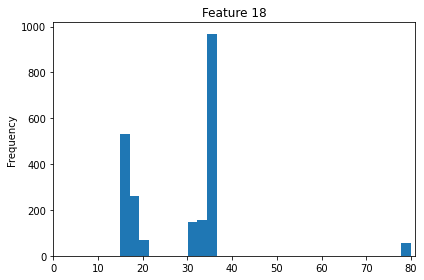

In [22]:
# histogram
ax = df.feat_18.plot.hist(bins=30)
ax.set(xlabel=None)
ax.set_xlim(0,81)
plt.title('Feature 18')
plt.tight_layout()
plt.show()

In [23]:
df[df['feat_18'] > 72]

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
50,50,NaN,AAR-RCN-98de6bc7-1,N#Cc1ncc(Br)cn1,1,train,8.24,0.19,8.24,0.19,...,0,0,0,0,0,0,0,0,0,0
390,390,NaN,CHEMBL108425,N#Cc1ccc(N(Cc2ccc(Br)cc2)n2cnnc2)cc1,0,train,8.92,0.64,8.92,0.64,...,0,0,0,0,0,0,0,0,0,0
411,411,NaN,CHEMBL1200935,Br.NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2c...,0,train,13.20,-0.82,13.20,0.00,...,0,0,0,0,0,0,0,0,0,0
417,417,NaN,CHEMBL120735,CCN(CCNC(=O)Nc1ccccc1Br)c1cccc(C)c1,0,train,11.96,-0.20,11.96,0.20,...,0,0,0,0,0,0,0,0,0,1
458,458,NaN,CHEMBL1401624,O=C(CC1NCCC[C@H]1O)Cn1cnc2cc(Br)c(Cl)cc2c1=O,0,train,12.52,-0.52,12.52,0.07,...,0,0,0,0,0,0,0,0,0,0
499,499,NaN,CHEMBL1709464,O=C1CN=C(c2ccccc2Cl)c2cc(Br)ccc2N1,0,train,11.73,-0.13,11.73,0.09,...,0,0,0,0,0,0,0,0,0,0
615,615,NaN,CHEMBL285063,C=CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,0,train,11.45,-0.26,11.45,0.26,...,0,0,0,0,0,0,0,0,0,0
621,621,NaN,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,0,train,12.10,0.03,12.10,0.03,...,0,0,0,0,0,0,0,0,0,0
667,667,NaN,CHEMBL34234,CCOP(=O)(Cc1ccc(C(=O)Nc2ccc(Br)cc2C#N)cc1)OCC,0,train,12.58,-3.19,12.58,0.14,...,0,0,0,0,0,0,0,0,0,0
685,685,NaN,CHEMBL3770173,COc1cc2c(cc1N[S+](=O)([O-])c1ccc(Br)cc1C)n(C)c...,0,train,12.84,-3.82,12.84,0.17,...,0,1,0,0,0,0,0,0,0,0


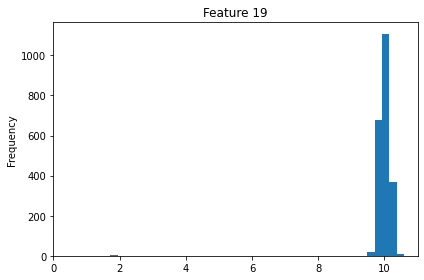

In [24]:
# histogram
ax = df.feat_19.plot.hist(bins=40)
ax.set(xlabel=None)
ax.set_xlim(0,11)
plt.title('Feature 19')
plt.tight_layout()
plt.show()

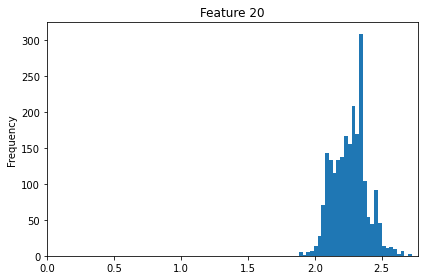

In [25]:
# histogram
ax = df.feat_20.plot.hist(bins=30)
plt.title('Feature 20')
ax.set_xbound(lower=0)
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

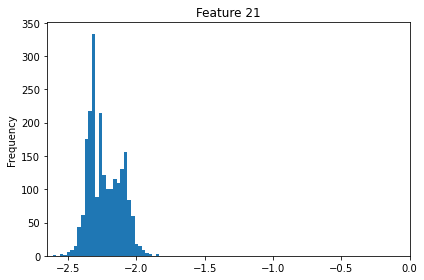

In [26]:
# histogram
ax = df.feat_21.plot.hist(bins=30)
plt.title('Feature 21')
ax.set_xbound(upper=0)
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

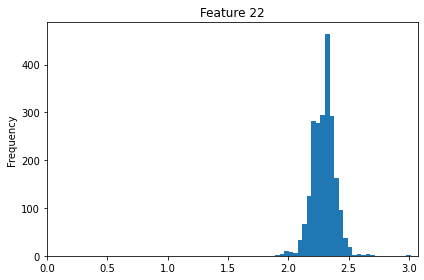

In [27]:
# histogram
ax = df.feat_22.plot.hist(bins=30)
ax.set(xlabel=None)
ax.set_xbound(lower=0)
plt.title('Feature 22')
plt.tight_layout()
plt.show()

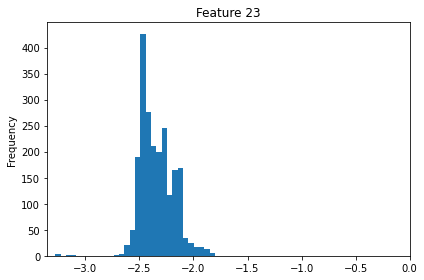

In [28]:
# histogram
ax = df.feat_23.plot.hist(bins=30)
ax.set(xlabel=None)
ax.set_xbound(upper=0)
plt.title('Feature 23')
plt.tight_layout()
plt.show()

In [29]:
df[df['feat_23'] < -3]

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
9,9,NaN,171822134,Cc1nc(CCC(=O)NCC[NH+]2CCC3(CCCCCc4ccccc4OCCNC3...,0,train,13.45,-3.17,13.45,0.01,...,0,1,0,0,0,0,0,0,0,0
14,14,NaN,24346622,CCOC(=O)c1ccc(NC(=O)CC2C(=O)N(c3ccc(C(=O)OCC)c...,0,train,13.82,-0.78,13.82,0.10,...,0,0,0,0,0,0,0,0,0,0
28,28,NaN,43966586,COc1ccc(C[NH+]2CC[NH+](CC(=O)NC(C)c3ccc4c(c3)O...,0,train,12.61,-0.07,12.61,0.07,...,0,0,0,0,0,0,0,0,0,0
1955,1955,NaN,16135771,CC1CN(C(=O)CCC(=O)NCCC[NH+]2CC[NH+](Cc3ccccc3)...,0,valid,12.84,-0.11,12.84,0.07,...,0,0,0,0,0,0,0,0,1,0
2071,2071,NaN,171835375,Cc1cc(OCC2(CC(=O)N3CC[NH+](C)CC3)CCN(S(=O)(=O)...,0,test,13.32,-3.44,13.32,0.01,...,0,1,0,0,0,0,0,0,0,0
2073,2073,NaN,25392386,COc1cccc(N2CCN(C(=O)c3coc(C[NH+]4CC[NH+](CC(O)...,0,test,13.07,-0.21,13.07,0.06,...,0,0,0,0,0,0,0,0,0,0


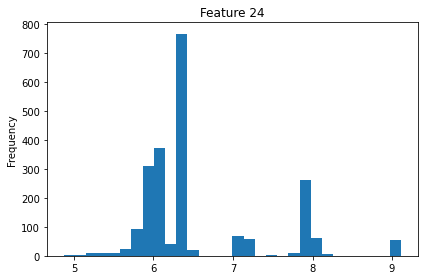

In [30]:
# histogram
ax = df.feat_24.plot.hist(bins=30)
ax.set(xlabel=None)
plt.title('Feature 24')
plt.tight_layout()
plt.show()

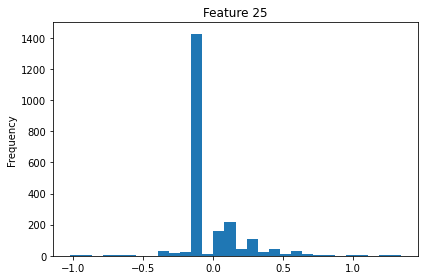

In [31]:
# histogram
ax = df.feat_25.plot.hist(bins=30)
ax.set(xlabel=None)
plt.title('Feature 25')
plt.tight_layout()
plt.show()

In [32]:
df[df['feat_25'] > 1]

,Unnamed: 0,lib_name,cmpd_id,smiles,label,subset,feat_1,feat_2,feat_3,feat_4,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
46,46,NaN,AAR-RCN-37d0aa00-1,N#Cc1nccc(Cl)n1,1,train,8.23,0.10,8.23,0.10,...,0,0,0,0,0,0,0,0,0,0
49,49,NaN,AAR-RCN-8752a6eb-1,Cc1cc(C)nc(C#N)n1,1,train,8.41,0.25,8.41,0.25,...,0,0,0,0,0,0,0,0,0,0
50,50,NaN,AAR-RCN-98de6bc7-1,N#Cc1ncc(Br)cn1,1,train,8.24,0.19,8.24,0.19,...,0,0,0,0,0,0,0,0,0,0
387,387,NaN,CHEMBL1078685,N#Cc1cc(-c2n[nH]c(-c3ccncc3)n2)ccn1,0,train,8.82,0.34,8.82,0.34,...,0,0,0,0,0,0,0,0,0,0
456,456,NaN,CHEMBL13790,N=C(N)NC(=N)Nc1cccc(Cl)c1,0,train,7.34,-0.29,7.34,0.07,...,0,0,0,0,0,0,0,0,0,0
545,545,NaN,CHEMBL2105689,N#C/C(=C1/SC[C@@H](c2ccc(Cl)cc2Cl)S1)n1ccnc1,0,train,9.38,0.22,9.38,0.22,...,2,0,0,0,0,0,0,0,0,0
710,710,NaN,CHEMBL412099,N#Cc1cccc(C#N)c1-c1nc2c3ccccc3c3cc(Cl)ccc3c2[nH]1,0,train,9.53,0.41,9.53,0.41,...,0,0,0,0,0,0,0,0,0,0
745,745,NaN,CHEMBL45245,O=c1[nH]c2ccccc2c2ccccc12,0,train,11.74,-0.02,11.74,0.02,...,0,0,0,0,0,0,0,0,0,0
768,768,NaN,CHEMBL542541,Cl.NNc1nncc2ccccc12,0,train,5.26,0.00,5.26,0.00,...,0,0,0,0,0,0,0,0,0,0
1626,1626,NaN,ZINC13536586,N#Cc1cc(-c2n[nH]c(-c3ccncc3)n2)ccn1,0,train,8.82,0.34,8.82,0.34,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# choose whether to drop or fill (i.e. mean, median, mode)
# drop unnecessary 'lib_name' (all NaN) and 'Unnamed: 0' (copy of index)
df.drop(['lib_name', 'Unnamed: 0'], axis=1, inplace=True)

# drop row with infinite values for features 11 & 13
df.drop(index=465, inplace=True)

In [34]:
# fill NaN feature values with mean
df['feat_18'].fillna(value=df['feat_18'].mean(), inplace=True)
df['feat_19'].fillna(value=df['feat_19'].mean(), inplace=True)
df['feat_20'].fillna(value=df['feat_20'].mean(), inplace=True)
df['feat_21'].fillna(value=df['feat_21'].mean(), inplace=True)
df['feat_22'].fillna(value=df['feat_22'].mean(), inplace=True)
df['feat_23'].fillna(value=df['feat_23'].mean(), inplace=True)
df['feat_24'].fillna(value=df['feat_24'].mean(), inplace=True)
df['feat_25'].fillna(value=df['feat_25'].mean(), inplace=True)

In [35]:
# remove all outlier rows that are 4+ standard deviations away from the mean, or the top 0.1%
for col in df[df.columns[4:213]]:
    mean = df[col].mean()
    sd = df[col].std()
    df = df[(df[col] <= mean + (4 * sd))]

In [36]:
# set object ids as indexes
df.set_index(['cmpd_id', 'smiles'], inplace=True)

In [37]:
# Export Cleaned Data w/out stdev drops
#df.to_csv('data/cleaned_full_dataset.csv')

## Sorting & Indexing

In [38]:
df.sort_values(by=["cmpd_id"], ascending=[True])

,,label,subset,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208
cmpd_id,smiles,,,,,,,,,,,,,,,,,,,,,
16016872,CCn1cc(C(=O)NCc2ccc3c(c2)OCO3)c(=O)c2cc(S(=O)(=O)N3CCCC3)ccc21,0,train,13.28,-3.69,13.28,0.04,0.58,483.55,458.35,483.15,...,0,1,0,0,0,0,0,0,0,0
16292231,CCOc1ccc(CNC(=O)Cn2cnc(S(=O)(=O)N3CCC(C)CC3)c2)cc1OC,0,test,12.77,-3.63,12.77,0.02,0.63,450.56,420.32,450.19,...,0,1,0,0,0,0,0,0,0,0
32494230,COc1cccc(CNC(=O)c2cccc(Nc3cc(C)nc4nc(-c5cccnc5)nn34)c2)c1,0,train,12.79,-0.17,12.79,0.17,0.37,465.52,442.33,465.19,...,0,0,0,0,0,0,0,0,0,0
32782830,CCCn1cc(C(=O)NCC2CCCO2)c(S(=O)(=O)N2CCN(c3ccc(Cl)cc3)CC2)n1,0,train,13.49,-3.92,13.49,0.03,0.60,496.03,465.79,495.17,...,0,1,0,0,0,0,0,0,0,0
43926720,CCCNC(=O)C(C)NC(=O)C1CCN(S(=O)(=O)c2cc(C(C)(C)C)ccc2C)CC1,0,train,13.30,-3.63,13.30,0.15,0.67,451.63,414.34,451.25,...,0,1,0,0,0,0,0,0,0,0
48930374,CCCOc1ccc(C=C(C(=O)NCCc2ccccc2)C(=O)NCCc2ccccc2)c(OCCC)c1,0,train,13.24,-0.43,13.24,0.04,0.16,514.67,476.36,514.28,...,0,0,0,0,0,0,0,0,0,0
6548341,CCOc1ccc(C(C(=O)NCC2CCCO2)N(C(=O)Cn2nnc3ccccc32)c2ccc(NC(C)=O)cc2)cc1,0,test,14.20,-1.02,14.20,0.07,0.28,570.65,536.38,570.26,...,0,0,0,0,0,0,0,0,0,0
6569505,CCOc1ccc(C(C(=O)NC2CCCCC2)N(C(=O)CCCC(=O)Nc2ccccn2)c2cc(OC)ccc2OC)cc1,0,train,14.21,-1.01,14.21,0.01,0.24,602.73,560.40,602.31,...,0,0,0,0,0,0,0,0,0,0
6594469,O=C(CN(CC1CCCO1)C(=O)CNS(=O)(=O)c1ccccc1)NC1CCCCC1,0,train,12.80,-3.80,12.80,0.09,0.61,437.56,406.31,437.20,...,0,1,0,0,0,0,0,0,0,0


In [39]:
df.mean(numeric_only=True)

label                0.76
feat_1              12.86
feat_2              -0.81
feat_3              12.86
feat_4               0.10
feat_5               0.65
feat_6             387.95
feat_7             367.34
feat_8             387.36
feat_9             141.84
feat_10              0.00
feat_11              0.25
feat_12             -0.40
feat_13              0.40
feat_14              0.25
feat_15              1.15
feat_16              1.94
feat_17              2.69
feat_18             28.74
feat_19              9.98
feat_20              2.26
feat_21             -2.25
feat_22              2.30
feat_23             -2.35
feat_24              6.36
feat_25             -0.05
feat_26              1.70
feat_27          1,000.50
feat_28             19.45
feat_29             15.30
feat_30             15.90
feat_31             13.35
feat_32              8.98
feat_33              9.40
feat_34              6.78
feat_35              7.25
feat_36              4.74
feat_37              5.09
feat_38     

## Grouping

In [40]:
df.groupby(by=['subset']).agg([np.mean, np.std, np.min, np.max])

label                feat_1                  feat_2       ... feat_206  \
        mean  std amin amax   mean  std  amin  amax   mean  std  ...     amin   
subset                                                           ...            
test    0.57 0.50    0    1  12.88 1.56  5.93 14.76  -0.98 1.24  ...        0   
train   0.76 0.42    0    1  12.85 1.24  4.14 14.85  -0.79 1.04  ...        0   
valid   0.79 0.42    0    1  12.95 0.67 11.84 14.05  -1.00 1.28  ...        0   

            feat_207                feat_208                 
       amax     mean  std amin amax     mean  std amin amax  
subset                                                       
test      0     0.00 0.00    0    0     0.04 0.19    0    1  
train     0     0.00 0.00    0    0     0.07 0.26    0    1  
valid     0     0.00 0.00    0    0     0.21 0.42    0    1  

[3 rows x 836 columns]

## Plotting & Analysis

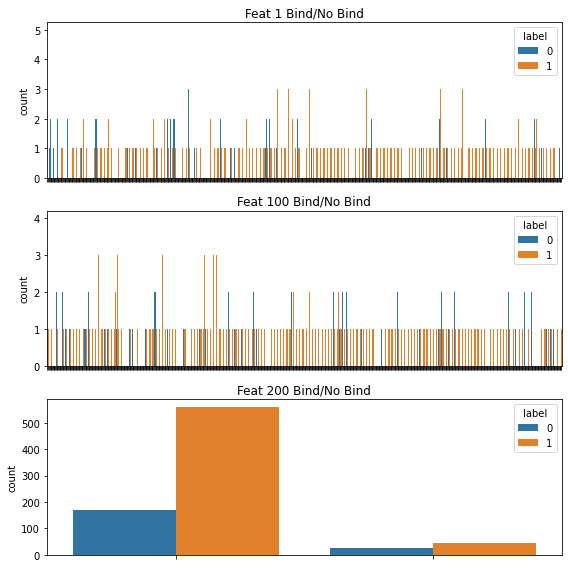

In [44]:
# create figures
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# plot data
g1 = sns.countplot(x="feat_1", hue="label", data=df, ax=ax[0], lw=0.)
g1.set(xlabel=None)
g1.set(xticklabels=[])
g1.set(title='Feat 1 Bind/No Bind')

g2 = sns.countplot(x="feat_100", hue="label", data=df, ax=ax[1], lw=0.)
g2.set(xlabel=None)
g2.set(xticklabels=[])
g2.set(title='Feat 100 Bind/No Bind')

g3 = sns.countplot(x="feat_200", hue="label", data=df, ax=ax[2], lw=0.)
g3.set(xlabel=None)
g3.set(xticklabels=[])
g3.set(title='Feat 200 Bind/No Bind')

plt.tight_layout()
plt.show()

## Finalize

In [ ]:
# Export Cleaned Data
df.to_csv('data/cleaned_data.csv')